In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Load the data from the Excel file
df = pd.read_excel('Data_Train.xlsx')

In [52]:
print(df.head(10))

             Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    1

# Step 1: Data Preprocessing


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [54]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [55]:
missing_data = df[df['Route'].isnull() | df['Total_Stops'].isnull()]
print(missing_data)

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [56]:
df.dropna(inplace=True)


In [57]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [58]:
df.duplicated().sum()

220

In [59]:
df.drop_duplicates(inplace = True)

In [60]:
df.duplicated().sum()

0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [62]:
# Convert 'Date_of_Journey' to datetime format and extract day and month
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [63]:
# Convert 'Dep_Time' and 'Arrival_Time' to datetime format and extract hour and minute
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute

In [64]:
# Handle 'Arrival_Time' separately due to potential date information included
arrival_times = df['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')
df['Arrival_Hour'] = pd.to_datetime(arrival_times[0], format='%H:%M').dt.hour
df['Arrival_Minute'] = pd.to_datetime(arrival_times[0], format='%H:%M').dt.minute

In [65]:
# Drop the original columns that have been transformed
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [66]:
# Convert 'Duration' to total minutes
duration = df['Duration'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')
duration = duration.fillna(0).astype(int)
df['Duration_Minutes'] = duration[0] * 60 + duration[1]

In [67]:
# Drop the original 'Duration' column
df.drop(['Duration'], axis=1, inplace=True)

In [68]:
df['Total_Stops'] = df['Total_Stops'].str.extract('(\d+)').fillna(0).astype(int)

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_15356\205611282.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [69]:
df

Airline    Source Destination                  Route  Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL            0   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR            2   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK            2   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR            1   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL            1   
...            ...       ...         ...                    ...          ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR            0   
10679    Air India   Kolkata    Banglore              CCU → BLR            0   
10680  Jet Airways  Banglore       Delhi              BLR → DEL            0   
10681      Vistara  Banglore   New Delhi              BLR → DEL            0   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK            2   

      Additional_Info  Price  Journey_Day  Journey_Month  Dep_Hour  \
0             No info   3897           24              3        22   
1             No info   7662            1              5         5   
2             No info  13882            9              6         9   
3             No info   6218           12              5        18   
4             No info  13302            1              3        16   
...               ...    ...          ...            ...       ...   
10678         No info   4107            9              4        19   
10679         No info   4145           27              4        20   
10680         No info   7229           27              4         8   
10681         No info  12648            1              3        11   
10682         No info  11753            9              5        10   

       Dep_Minute  Arrival_Hour  Arrival_Minute  Duration_Minutes  
0              20             1              10               170  
1              50            13              15               445  
2              25             4              25              1140  
3               5            23              30               325  
4              50            21              35               285  
...           ...           ...             ...               ...  
10678          55            22              25               150  
10679          45            23              20               155  
10680          20            11              20               180  
10681          30            14              10               160  
10682          55            19              15               500  

[10462 rows x 14 columns]

# Visualization

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

In [71]:
px.histogram(data_frame=df,x="Airline")

In [72]:
df["Source"].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [73]:
px.histogram(data_frame=df,x="Source")

In [74]:
px.histogram(data_frame=df,x="Destination")

In [75]:
px.histogram(data_frame=df,x="Route")

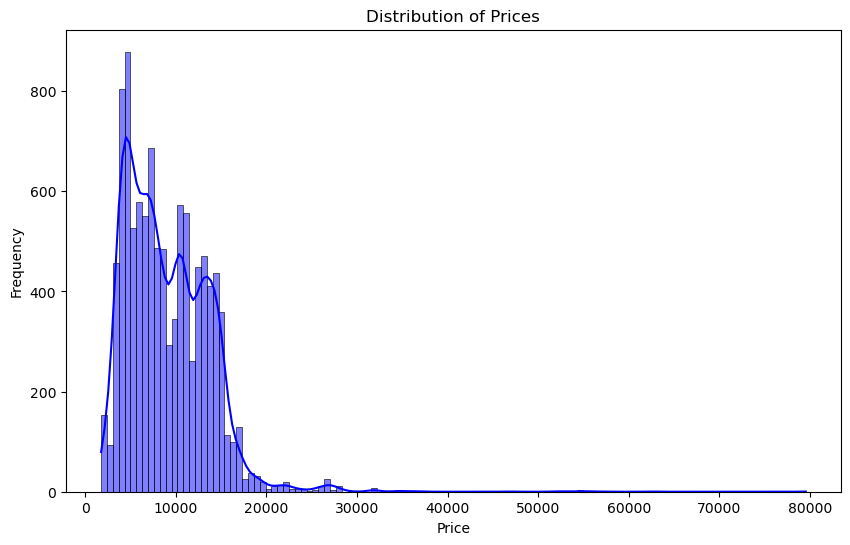

In [76]:
# Visualization 1: Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue') 
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


C:\Users\thes Computer\AppData\Local\Temp\ipykernel_15356\553498715.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




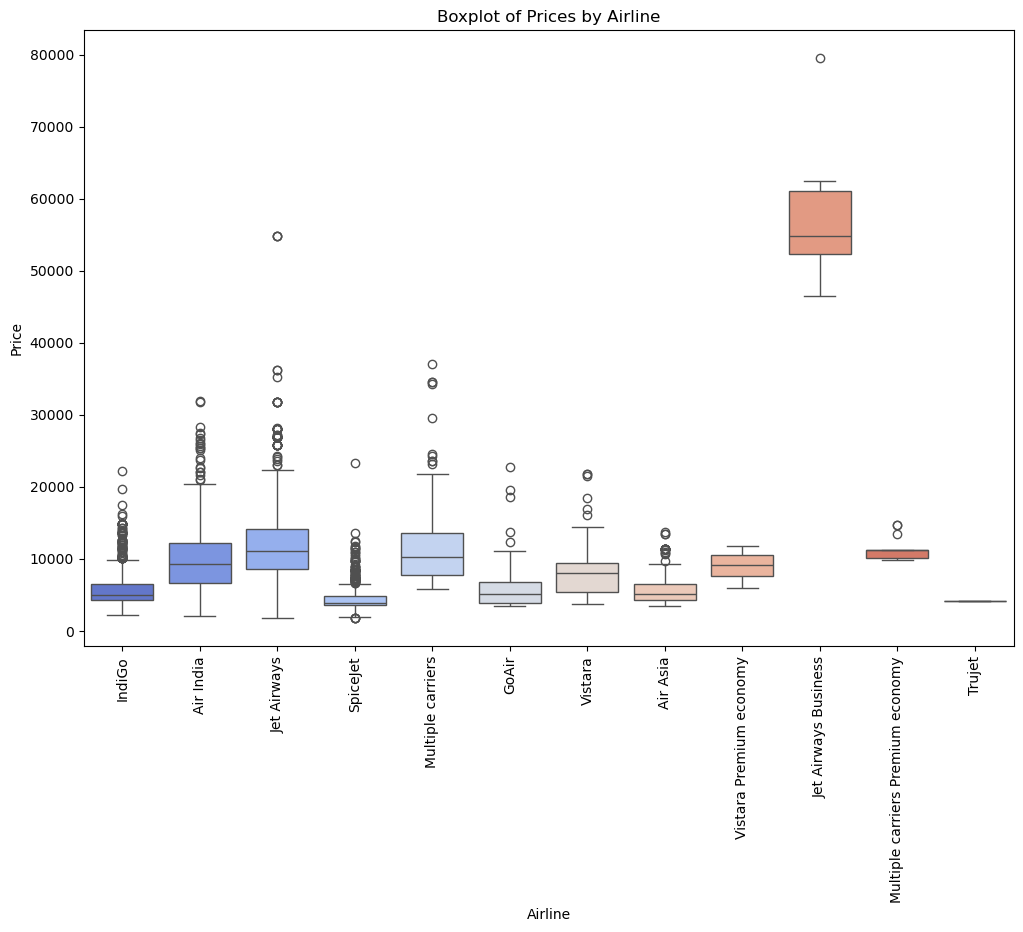

In [77]:
# Visualization 2: Boxplot of Prices by Airline
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df, palette='coolwarm')
plt.title('Boxplot of Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Boxplot of Prices by Airline:

This boxplot shows the distribution of ticket prices for each airline. It helps to identify the median, quartiles, and potential outliers for each airline.


C:\Users\thes Computer\AppData\Local\Temp\ipykernel_15356\3270494302.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




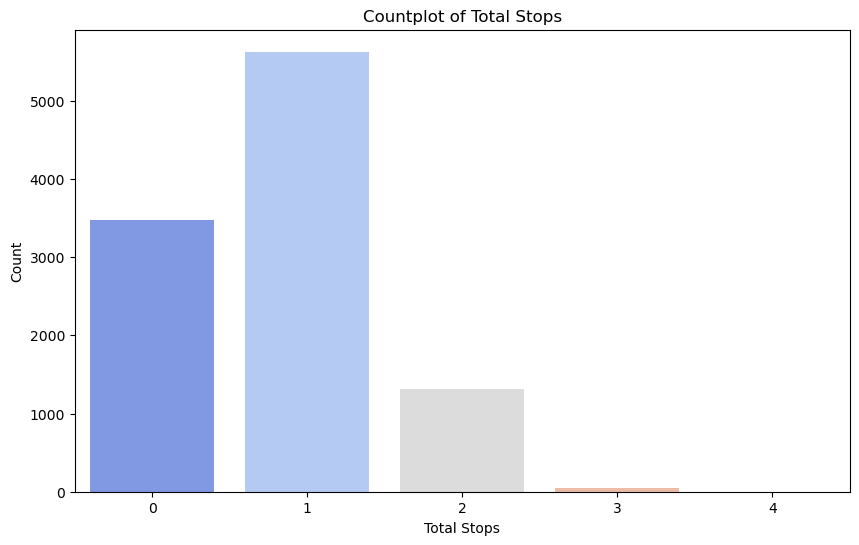

In [78]:
# Visualization 3: Countplot of Total Stops
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Stops', data=df, palette='coolwarm')
plt.title('Countplot of Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.show()

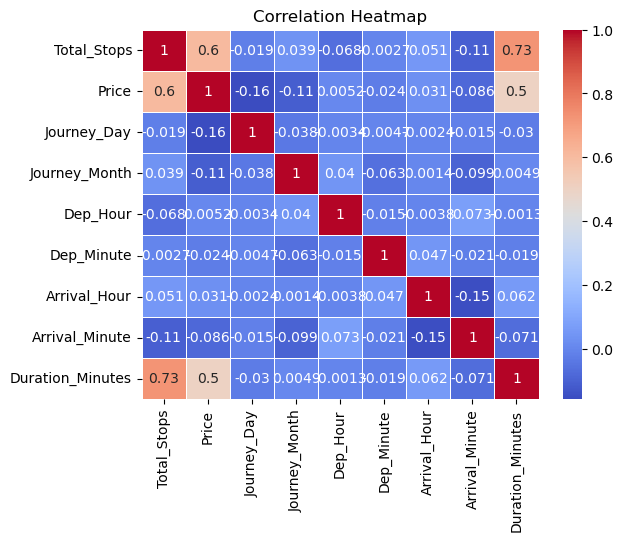

In [79]:

numeric_df = df.select_dtypes(include=['int'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   Total_Stops       10462 non-null  int32 
 5   Additional_Info   10462 non-null  object
 6   Price             10462 non-null  int64 
 7   Journey_Day       10462 non-null  int32 
 8   Journey_Month     10462 non-null  int32 
 9   Dep_Hour          10462 non-null  int32 
 10  Dep_Minute        10462 non-null  int32 
 11  Arrival_Hour      10462 non-null  int32 
 12  Arrival_Minute    10462 non-null  int32 
 13  Duration_Minutes  10462 non-null  int32 
dtypes: int32(8), int64(1), object(5)
memory usage: 899.1+ KB


In [81]:
# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10462 non-null  int32
 1   Source            10462 non-null  int32
 2   Destination       10462 non-null  int32
 3   Route             10462 non-null  int32
 4   Total_Stops       10462 non-null  int32
 5   Additional_Info   10462 non-null  int32
 6   Price             10462 non-null  int64
 7   Journey_Day       10462 non-null  int32
 8   Journey_Month     10462 non-null  int32
 9   Dep_Hour          10462 non-null  int32
 10  Dep_Minute        10462 non-null  int32
 11  Arrival_Hour      10462 non-null  int32
 12  Arrival_Minute    10462 non-null  int32
 13  Duration_Minutes  10462 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 694.7 KB


In [83]:
df.to_excel('Data_Processed.xlsx', index=False)

# Visualization

## Step 2: Split the data into training and testing 




In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# from xgboost import XGBClassifier

In [85]:
df_Processed = pd.read_excel('Data_Processed.xlsx')

In [86]:
X = df_Processed.drop(['Price'], axis=1)
y = df_Processed['Price']

In [87]:
Num_Columns = X.select_dtypes(include="number")


In [88]:
Num_Steps = [
    ("Num_Imputer", KNNImputer()),  
    ("Scaler", StandardScaler())   
]
Num_Pipeline = Pipeline(steps=Num_Steps)


In [89]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns),
    ],
    remainder='passthrough' #drop
)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "LinearRegression": LinearRegression(),
    "SVR": SVR()
}

In [92]:
results = {}
for model_name, model in models.items():

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    results[model_name] = {
        "Mean Squared Error": mse,
        "R2 Score": r2,
        "Training Score": round(train_score*100,2),
        "Testing Score": round(test_score*100,2),
        "Overfitting": train_score - test_score > 0.1
    }


In [93]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R2 Score: {result['R2 Score']}")
    print(f"Training Score: {result['Training Score']} %")
    print(f"Testing Score: {result['Testing Score']} %")
    print(f"Overfitting: {result['Overfitting']}")
    print("-" * 30)  

Model: RandomForestRegressor
Mean Squared Error: 2378534.3218983742
R2 Score: 0.8859231274066675
Training Score: 95.13 %
Testing Score: 88.59 %
Overfitting: False
------------------------------
Model: LinearRegression
Mean Squared Error: 11533945.243941583
R2 Score: 0.4468205104387748
Training Score: 43.34 %
Testing Score: 44.68 %
Overfitting: False
------------------------------
Model: SVR
Mean Squared Error: 17410806.5376594
R2 Score: 0.16496039562779374
Training Score: 14.95 %
Testing Score: 16.5 %
Overfitting: False
------------------------------
